## Team 7: Online News Popularity

**Dataset Information**: (http://archive.ics.uci.edu/ml/datasets/Online+News+Popularity)

The articles were published by Mashable (www.mashable.com) and their content as the rights to reproduce it belongs to them. Hence, this dataset does not share the original content but some statistics associated with it. The original content be publicly accessed and retrieved using the provided urls. Acquisition date: January 8, 2015 

The estimated relative performance values were estimated by the authors using a Random Forest classifier and a rolling windows as assessment method. See their article for more details on how the relative performance values were set.

Objective: **predict the number of shares in social networks (popularity)**.

**Attribute Information**:

Number of Attributes: 61 (58 predictive attributes, 2 non-predictive, 1 goal field) 

0. url: URL of the article (non-predictive) 
1. timedelta: Days between the article publication and the dataset acquisition (non-predictive) 
2. n_tokens_title: Number of words in the title 
3. n_tokens_content: Number of words in the content 
4. n_unique_tokens: Rate of unique words in the content 
5. n_non_stop_words: Rate of non-stop words in the content 
6. n_non_stop_unique_tokens: Rate of unique non-stop words in the content 
7. num_hrefs: Number of links 
8. num_self_hrefs: Number of links to other articles published by Mashable 
9. num_imgs: Number of images 
10. num_videos: Number of videos 
11. average_token_length: Average length of the words in the content 
12. num_keywords: Number of keywords in the metadata 
13. data_channel_is_lifestyle: Is data channel 'Lifestyle'? 
14. data_channel_is_entertainment: Is data channel 'Entertainment'? 
15. data_channel_is_bus: Is data channel 'Business'? 
16. data_channel_is_socmed: Is data channel 'Social Media'? 
17. data_channel_is_tech: Is data channel 'Tech'? 
18. data_channel_is_world: Is data channel 'World'? 
19. kw_min_min: Worst keyword (min. shares) 
20. kw_max_min: Worst keyword (max. shares) 
21. kw_avg_min: Worst keyword (avg. shares) 
22. kw_min_max: Best keyword (min. shares) 
23. kw_max_max: Best keyword (max. shares) 
24. kw_avg_max: Best keyword (avg. shares) 
25. kw_min_avg: Avg. keyword (min. shares) 
26. kw_max_avg: Avg. keyword (max. shares) 
27. kw_avg_avg: Avg. keyword (avg. shares) 
28. self_reference_min_shares: Min. shares of referenced articles in Mashable 
29. self_reference_max_shares: Max. shares of referenced articles in Mashable 
30. self_reference_avg_sharess: Avg. shares of referenced articles in Mashable 
31. weekday_is_monday: Was the article published on a Monday? 
32. weekday_is_tuesday: Was the article published on a Tuesday? 
33. weekday_is_wednesday: Was the article published on a Wednesday? 
34. weekday_is_thursday: Was the article published on a Thursday? 
35. weekday_is_friday: Was the article published on a Friday? 
36. weekday_is_saturday: Was the article published on a Saturday? 
37. weekday_is_sunday: Was the article published on a Sunday? 
38. is_weekend: Was the article published on the weekend?

LDA (Latent Dirichlet Allocation) is a “generative probabilistic model” of a collection of composites made up of parts. The probabilistic topic model estimated by LDA consists of two tables (matrices). The first table describes the probability or chance of selecting a particular part when sampling a particular topic (category). The second table describes the chance of selecting a particular topic when sampling a particular document or composite.
39. LDA_00: Closeness to LDA topic 0 
40. LDA_01: Closeness to LDA topic 1 
41. LDA_02: Closeness to LDA topic 2 
42. LDA_03: Closeness to LDA topic 3 
43. LDA_04: Closeness to LDA topic 4 
44. global_subjectivity: Text subjectivity 
45. global_sentiment_polarity: Text sentiment polarity 
46. global_rate_positive_words: Rate of positive words in the content 
47. global_rate_negative_words: Rate of negative words in the content 
48. rate_positive_words: Rate of positive words among non-neutral tokens 
49. rate_negative_words: Rate of negative words among non-neutral tokens 
50. avg_positive_polarity: Avg. polarity of positive words 
51. min_positive_polarity: Min. polarity of positive words 
52. max_positive_polarity: Max. polarity of positive words 
53. avg_negative_polarity: Avg. polarity of negative words 
54. min_negative_polarity: Min. polarity of negative words 
55. max_negative_polarity: Max. polarity of negative words 
56. title_subjectivity: Title subjectivity 
57. title_sentiment_polarity: Title polarity 
58. abs_title_subjectivity: Absolute subjectivity level 
59. abs_title_sentiment_polarity: Absolute polarity level 
60. shares: Number of shares (target)

In [1]:
# load the data as dataframe
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

csv_path = './datasets/OnlineNewsPopularity.csv'
df = pd.read_csv(csv_path)

## 1) EDA - Data Cleaning

In [2]:
# clean column names
df.columns = df.columns.map(lambda x: x.replace(' ', ''))
# remove weird spaces

In [3]:
# df.head()

In [4]:
df.shape

(39644, 61)

In [5]:
# df.describe()

In [6]:
# df.info()

## EDA - Feature Engineering

In [7]:
# feature engineering: creating column for article date

# add column for dataset acquisition date
date = []
for i in df.values:
    date.append('2015-01-08')

df['data_acquired_on'] = pd.to_datetime(date)

# finding article publication date
df['article_published_on'] = df['data_acquired_on']\
            - df['timedelta'].astype('timedelta64[D]')

df.sample(5)

# note: timedelta values may be slightly off by a few days

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares,data_acquired_on,article_published_on
12166,http://mashable.com/2013/08/27/yahoo-stream-ads/,499.0,9.0,509.0,0.560000,1.0,0.760797,10.0,5.0,1.0,...,-0.215152,-0.5,-0.05,0.6,0.2,0.1,0.2,1100,2015-01-08,2013-08-27
9087,http://mashable.com/2013/06/27/street-view-tre...,560.0,8.0,1275.0,0.424000,1.0,0.589168,38.0,9.0,0.0,...,-0.321275,-1.0,-0.10,0.0,0.0,0.5,0.0,998,2015-01-08,2013-06-27
15154,http://mashable.com/2013/10/25/zombie-ted-talk/,439.0,11.0,400.0,0.538847,1.0,0.683128,11.0,8.0,0.0,...,-0.141667,-0.2,-0.10,0.0,0.0,0.5,0.0,2700,2015-01-08,2013-10-26
5662,http://mashable.com/2013/04/20/doctor-facebook/,628.0,8.0,695.0,0.459971,1.0,0.623153,7.0,2.0,1.0,...,-0.175463,-0.4,-0.10,0.0,0.0,0.5,0.0,2800,2015-01-08,2013-04-20
6685,http://mashable.com/2013/05/10/mobile-payment-...,608.0,7.0,1731.0,0.298770,1.0,0.405479,30.0,0.0,1.0,...,-0.187946,-0.8,-0.05,0.0,0.0,0.5,0.0,2100,2015-01-08,2013-05-10


In [8]:
# combining channel dummy variables into single column

channel = {}

channel['lifestyle'] = df['data_channel_is_lifestyle']
channel['entertainment'] = \
                    df['data_channel_is_entertainment']
channel['business'] = df['data_channel_is_bus']
channel['social media'] = df['data_channel_is_socmed']
channel['tech'] = df['data_channel_is_tech']
channel['world'] = df['data_channel_is_world']

channels = pd.DataFrame(channel)

def get_channels(row):
    for c in channels.columns:
        if row[c]==1:
            return c

channels = channels.apply(get_channels, axis=1)

df = pd.concat([df,channels],axis=1)
df.rename(columns={0:'channel_type'},inplace=True)
df.head()


,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares,data_acquired_on,article_published_on,channel_type
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593,2015-01-08,2013-01-07,entertainment
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711,2015-01-08,2013-01-07,business
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500,2015-01-08,2013-01-07,business
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200,2015-01-08,2013-01-07,entertainment
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505,2015-01-08,2013-01-07,tech


In [9]:
# combining weekday dummy variables into single column

wkday = {}

wkday['Monday'] = df['weekday_is_monday']
wkday['Tuesday'] = df['weekday_is_tuesday']
wkday['Wednesday'] = df['weekday_is_wednesday']
wkday['Thursday'] = df['weekday_is_thursday']
wkday['Friday'] = df['weekday_is_friday']
wkday['Saturday'] = df['weekday_is_saturday']
wkday['Sunday'] = df['weekday_is_sunday']

weekday = pd.DataFrame(wkday)

def get_weekday(row):
    for c in weekday.columns:
        if row[c]==1:
            return c

weekday = weekday.apply(get_weekday, axis=1)

df = pd.concat([df,weekday],axis=1)
df.rename(columns={0:'weekday_type'},inplace=True)
df.head()


,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares,data_acquired_on,article_published_on,channel_type,weekday_type
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,-0.200000,0.500000,-0.187500,0.000000,0.187500,593,2015-01-08,2013-01-07,entertainment,Monday
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,-0.100000,0.000000,0.000000,0.500000,0.000000,711,2015-01-08,2013-01-07,business,Monday
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,-0.133333,0.000000,0.000000,0.500000,0.000000,1500,2015-01-08,2013-01-07,business,Monday
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,-0.166667,0.000000,0.000000,0.500000,0.000000,1200,2015-01-08,2013-01-07,entertainment,Monday
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,-0.050000,0.454545,0.136364,0.045455,0.136364,505,2015-01-08,2013-01-07,tech,Monday


## EDA - Visualization

In [ ]:
# social media shares vs number of words in the title

sns.lmplot(data=df,x='n_tokens_title',y='shares',\
            palette="Set1")
ax = plt.gca()
ax.set_ylim([0, 100000])
ax.set_title("Social media shares vs title length",size=15)


In [ ]:
# social media shares vs number of words in the content

sns.lmplot(data=df,x='n_tokens_content',y='shares',\
           palette="Set1")
ax = plt.gca()
ax.set_ylim([0, 50000])
ax.set_title("Social media shares vs content length",\
             size=15)


In [ ]:
# social media shares vs number of images

sns.lmplot(data=df,x='num_imgs',y='shares',palette="Set1")
ax = plt.gca()
ax.set_ylim([0, 50000])
ax.set_title("Social media shares vs number of images",\
             size=15)


In [ ]:
# social media shares vs number of videos

sns.lmplot(data=df,x='num_videos',y='shares',\
           palette="Set1")
ax = plt.gca()
ax.set_ylim([0, 50000])
ax.set_title("Social media shares vs number of videos",\
             size=15)


In [ ]:
# social media shares vs average keyword

sns.lmplot(data=df,x='kw_avg_avg',y='shares',\
           palette="Set1")
ax = plt.gca()
ax.set_ylim([0, 50000])
ax.set_title("Social media shares vs average keyword",\
             size=15)


In [ ]:
# social media shares vs number of links to other articles

sns.lmplot(data=df,x='num_self_hrefs',y='shares',palette="Set1")
ax = plt.gca()
ax.set_ylim([0, 50000])
ax.set_title("Social media shares vs links to other articles",size=15)


In [ ]:
# social media shares vs min shares of referenced articles

sns.lmplot(data=df,x='self_reference_min_shares',y='shares',palette="Set1")
ax = plt.gca()
ax.set_ylim([0, 50000])
ax.set_title("Social media shares vs min shares of referenced articles",size=15)


In [ ]:
# social media shares vs max shares of referenced articles

sns.lmplot(data=df,x='self_reference_max_shares',y='shares',palette="Set1")
ax = plt.gca()
ax.set_ylim([0, 50000])
ax.set_title("Social media shares vs max shares of referenced articles",size=15)


In [ ]:
# social media shares vs avg shares of referenced articles

sns.lmplot(data=df,x='self_reference_avg_sharess',y='shares',palette="Set1")
ax = plt.gca()
ax.set_ylim([0, 50000])
ax.set_title("Social media shares vs avg shares of referenced articles",size=15)


Text(0.5,1,'Social media shares vs weekday')

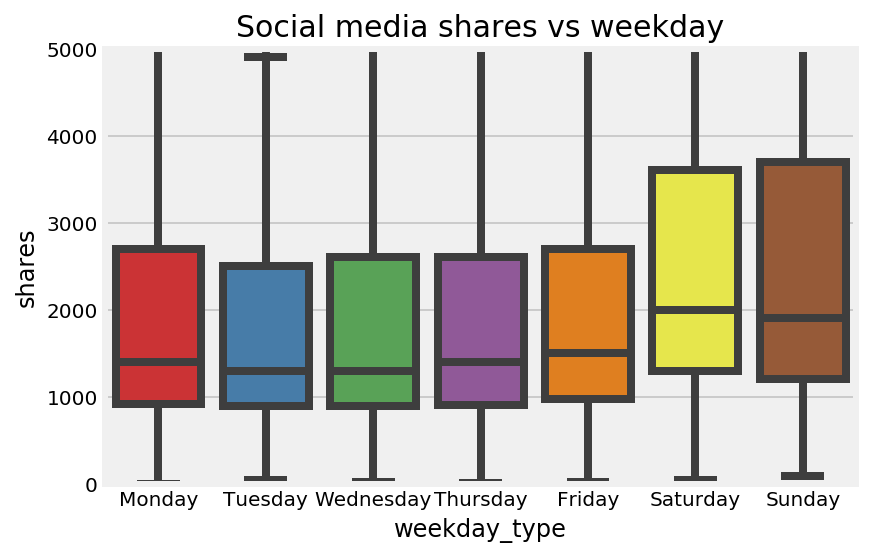

In [10]:
# social media shares vs weekday
sns.boxplot(data=df, x='weekday_type',y='shares',\
            palette='Set1')
ax = plt.gca()
ax.set_ylim([0, 5000])  
ax.set_title("Social media shares vs weekday",size=15)

Text(0.5,1,'Social media shares vs channel type')

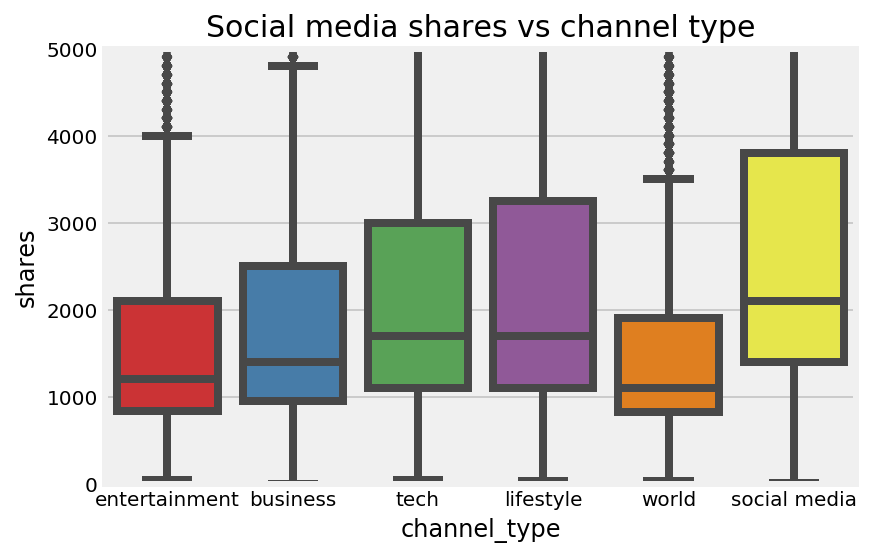

In [11]:
# social media shares vs channel type
sns.boxplot(data=df, x='channel_type',y='shares',\
            palette='Set1')
ax = plt.gca()
ax.set_ylim([0, 5000])  
ax.set_title("Social media shares vs channel type",size=15)

## 2) Correlation with target 

What features are more correlated with the target variable (we're interested in linear relationship, monotonic relationship and non-linear/non-monotonic relationship [e.g. a "circular" relationship, in this case a qualitative analysis is good enough, since a qualitative analysis is complex to do])?

In [12]:
target = df['shares']

In [13]:
# finding top 10 correlated variables with 'shares'
top_correlated = df.corr()['shares'].abs()\
                .sort_values()[::-1][1:11]
top_correlated

# kw_avg_avg (+), LDA_03 (+), kw_max_avg (+), LDA_02 (-),
# self_reference_avg_sharess (+), kw_avg_max (+)
# data_channel_is_world (-), self_reference_max_shares (+),
# num_hrefs (+), self_reference_min_shares (+)

kw_avg_avg                    0.110413
LDA_03                        0.083771
kw_max_avg                    0.064306
LDA_02                        0.059163
self_reference_avg_sharess    0.057789
self_reference_min_shares     0.055958
data_channel_is_world         0.049497
self_reference_max_shares     0.047115
num_hrefs                     0.045404
kw_avg_max                    0.044686
Name: shares, dtype: float64

In [14]:
top_correlated_columns = list(top_correlated.keys())
top_correlated_columns

['kw_avg_avg',
 'LDA_03',
 'kw_max_avg',
 'LDA_02',
 'self_reference_avg_sharess',
 'self_reference_min_shares',
 'data_channel_is_world',
 'self_reference_max_shares',
 'num_hrefs',
 'kw_avg_max']

## 3) Build the best model with max 5 features (select them by running EDA).

Run a proper evaluation with cross validation, analysis of the residuals, analysis of the coefficients, etc. Try the different models we studied (lasso, ridge, etc.) and play with their parameters to try to improve the performances.

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

df1 = df.copy(deep=True)

# target variable: shares
y = df1['shares']

# setting predictor variables
X = df1[['kw_avg_avg', 'LDA_03', 'kw_max_avg', 'LDA_02',\
          'self_reference_avg_sharess']]

# initialize StandardScaler object
ss = StandardScaler()

# standardizing the X design matrix
Xs = ss.fit_transform(X)

# create train-test set ratio: 0.2 - 0.8
X_train, X_test, y_train, y_test = \
            train_test_split(Xs, y, test_size= 0.2)

print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(31715, 5) (31715,)
(7929, 5) (7929,)


In [16]:
import numpy as np
from sklearn.linear_model import LinearRegression, Ridge,\
        Lasso, ElasticNet, RidgeCV, LassoCV, ElasticNetCV
from sklearn.model_selection import KFold,\
        cross_val_score, cross_val_predict
from sklearn import metrics

In [17]:
# Linear Regression:

# setting up the linear regression object
lr = LinearRegression()

# cross_val_score returns the R2 score for each testing set
# cross_val_predict returns predicted values

linreg_scores = cross_val_score(lr, Xs, y, cv=10)

# print(linreg_scores)
# shows R2 score for each CV fold
print('average R^2 score:', np.mean(linreg_scores))
# shows average R2 score

average R^2 score: 0.01800027429090866


In [18]:
## optimal value for ridge regression alpha

ridge_reg_alphas = np.logspace(-2,7,20)

# let sklearn choose range of alphas
optimal_ridge = RidgeCV(alphas=ridge_reg_alphas, cv=10)

optimal_ridge.fit(Xs, y)
print('optimal ridge alpha is: ',optimal_ridge.alpha_)

## finding R^2 for ridge regression using optimal alpha

# setting up the ridge regression object
ridge_reg = Ridge(alpha=optimal_ridge.alpha_)

# cross_val_score returns the R2 score for each testing set
# cross_val_predict returns predicted values

ridge_scores = cross_val_score(ridge_reg, Xs, y, cv=10)

# print('ridge scores: ',ridge_scores) 
# shows R2 score for each CV fold
print('R2 for ridge is: ',np.mean(ridge_scores))
# shows average R2 score

optimal ridge alpha is:  4832.930238571752
R2 for ridge is:  0.01838745387959718


In [19]:
## optimal value for lasso regression alpha

# let sklearn choose range of alphas
optimal_lasso = LassoCV(cv=10, verbose=1)

optimal_lasso.fit(Xs, y)
print('optimal lasso alpha is: ',optimal_lasso.alpha_)

## finding R^2 for ridge regression using optimal alpha

# setting up the Lasso regression object
lasso_reg = Lasso(alpha=optimal_lasso.alpha_)

# cross_val_score returns the R2 score for each testing set
# cross_val_predict returns predicted values

lasso_scores = cross_val_score(lasso_reg, Xs, y, cv=10)

# print('lasso scores: ',lasso_scores) 
# shows R2 score for each CV fold
print('R2 for lasso is: ',np.mean(lasso_scores))
# shows average R2 score

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
.......................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

optimal lasso alpha is:  14.75999077449656
R2 for lasso is:  0.018207019951485704


In [20]:
## optimal value for elastic net regression alpha

l1_ratios = np.linspace(0.01, 1.0, 30)

optimal_enet = ElasticNetCV(l1_ratio=l1_ratios,\
                            n_alphas=30, cv=10)
optimal_enet.fit(Xs, y)

print('optimal elastic net alpha is: ',optimal_enet.alpha_)
print('l1_ratio :',optimal_enet.l1_ratio_)

## R^2 for elastic net regression using optimal alpha
enet = ElasticNet(alpha=optimal_enet.alpha_,\
                  l1_ratio=optimal_enet.l1_ratio_)

enet_scores = cross_val_score(enet, Xs, y, cv=10)

# print('enet scores: ',enet_scores)
print('R2 for elastic net is: ',np.mean(enet_scores))


optimal elastic net alpha is:  1.3291222077408638
l1_ratio : 0.9658620689655173
R2 for elastic net is:  0.01837585503387913


**Comparing coefficients of Ridge, Lasso and Elastic Net (5 features)**

In [21]:
# sorting coeff for variables in ridge regression

ridge_reg.fit(Xs,y)
ridge_coefs = pd.DataFrame({'variable':X.columns,\
                           'coef':ridge_reg.coef_,\
                    'abs_coef':np.abs(ridge_reg.coef_)})

ridge_coefs.sort_values('abs_coef',inplace=True,\
                        ascending=False)
ridge_coefs

,variable,coef,abs_coef
0,kw_avg_avg,1023.977093,1023.977093
4,self_reference_avg_sharess,450.372980,450.372980
1,LDA_03,421.295012,421.295012
3,LDA_02,-243.383965,243.383965
2,kw_max_avg,-235.050723,235.050723


In [22]:
# sorting coeff for variables in lasso regression

lasso_reg.fit(Xs,y)
lasso_coefs = pd.DataFrame({'variable':X.columns,\
                           'coef':lasso_reg.coef_,\
                    'abs_coef':np.abs(lasso_reg.coef_)})

lasso_coefs.sort_values('abs_coef',inplace=True,\
                        ascending=False)
lasso_coefs

,variable,coef,abs_coef
0,kw_avg_avg,1458.210042,1458.210042
2,kw_max_avg,-587.786649,587.786649
4,self_reference_avg_sharess,479.408199,479.408199
1,LDA_03,351.858197,351.858197
3,LDA_02,-197.447376,197.447376


In [23]:
# sorting coeff for variables in Elastic Net regression

enet.fit(Xs,y)
enet_coefs = pd.DataFrame({'variable':X.columns,\
                           'coef':enet.coef_,\
                           'abs_coef':np.abs(enet.coef_)})

enet_coefs.sort_values('abs_coef',inplace=True,\
                        ascending=False)
enet_coefs

,variable,coef,abs_coef
0,kw_avg_avg,1266.894635,1266.894635
4,self_reference_avg_sharess,476.023553,476.023553
2,kw_max_avg,-436.319766,436.319766
1,LDA_03,392.442963,392.442963
3,LDA_02,-224.214614,224.214614


**Comparing residuals of Ridge, Lasso and Elastic Net (5 features)**

Residuals Plot function from Yellowbrick module plots the difference between the expected and actual values
(http://www.scikit-yb.org/en/latest/api/regressor/residuals.html)

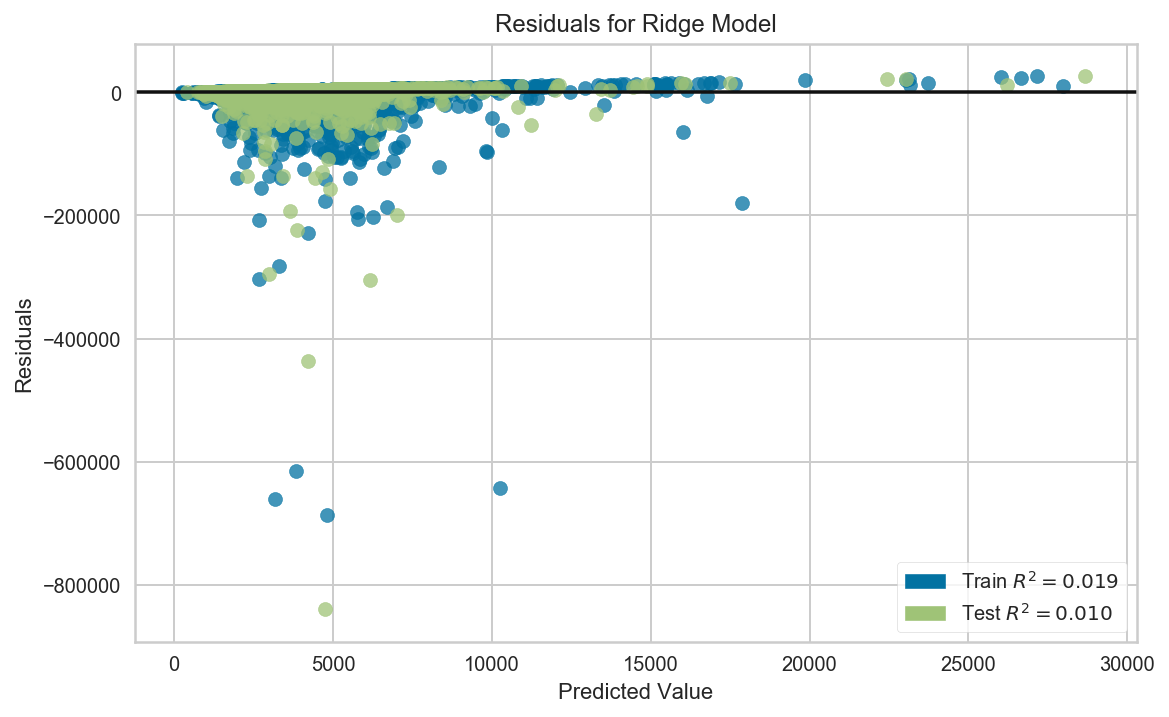

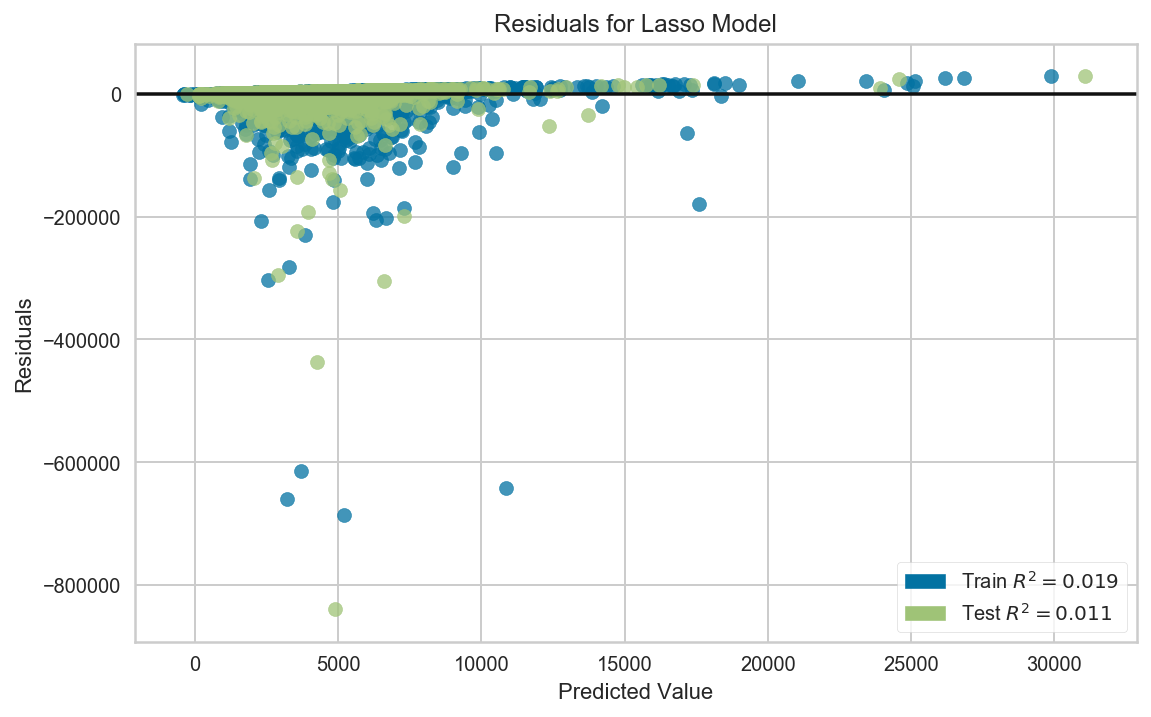

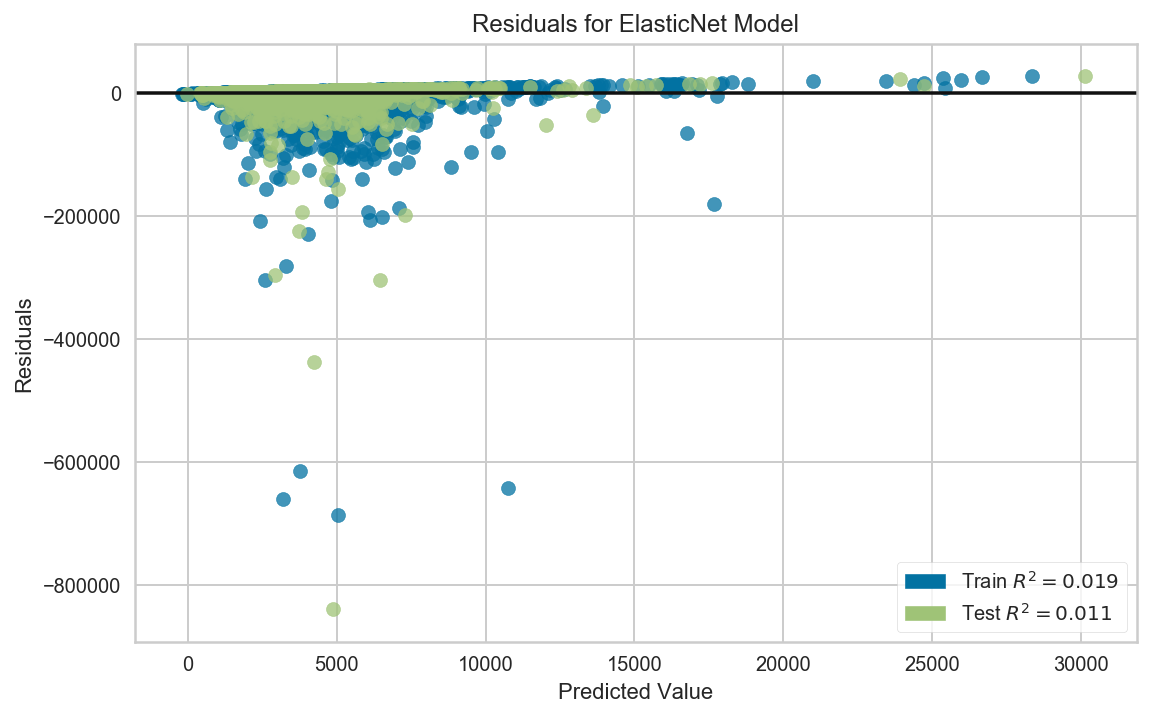

In [24]:
import yellowbrick.regressor
from yellowbrick.regressor import ResidualsPlot

# ridge = Ridge()
visualizer = ResidualsPlot(ridge_reg,hist=False)

visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.poof()

# lasso = Lasso()
visualizer = ResidualsPlot(lasso_reg,hist=False)

visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.poof() 

# enet = ElasticNet()
visualizer = ResidualsPlot(enet,hist=False)

visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.poof() 

## 4) Build the best model with max 10 features (select them by running EDA).

Run a proper evaluation with cross validation, analysis of the residuals, analysis of the coefficients, etc. Try the different models we studied (lasso, ridge, etc.) and play with their parameters to try to improve the performances.

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

df2 = df.copy(deep=True)

# target variable: shares
y = df2['shares']

# setting predictor variables
X = df2[['kw_avg_avg', 'LDA_03', 'kw_max_avg', 'LDA_02',\
          'self_reference_avg_sharess',\
         'self_reference_min_shares',\
         'data_channel_is_world',\
         'self_reference_max_shares','num_hrefs',\
         'kw_avg_max']]

# initialize StandardScaler object
ss = StandardScaler()

# standardizing the X design matrix
Xs = ss.fit_transform(X)

# create train-test set ratio: 0.2 - 0.8
X_train, X_test, y_train, y_test = \
            train_test_split(Xs, y, test_size= 0.2)

print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(31715, 10) (31715,)
(7929, 10) (7929,)


In [26]:
## optimal value for ridge regression alpha

ridge_reg_alphas = np.logspace(-2,7,20)

optimal_ridge = RidgeCV(alphas=ridge_reg_alphas, cv=10)

optimal_ridge.fit(Xs, y)
print('optimal ridge alpha is: ',optimal_ridge.alpha_)

## finding R^2 for ridge regression using optimal alpha

ridge_reg = Ridge(alpha=optimal_ridge.alpha_)
ridge_scores = cross_val_score(ridge_reg, Xs, y, cv=10)
print('R2 for ridge is: ',np.mean(ridge_scores))

## optimal value for lasso regression alpha

optimal_lasso = LassoCV(cv=10, verbose=1)

optimal_lasso.fit(Xs, y)
print('optimal lasso alpha is: ',optimal_lasso.alpha_)

## finding R^2 for ridge regression using optimal alpha

lasso_reg = Lasso(alpha=optimal_lasso.alpha_)
lasso_scores = cross_val_score(lasso_reg, Xs, y, cv=10)
print('R2 for lasso is: ',np.mean(lasso_scores))

## optimal value for elastic net regression alpha

l1_ratios = np.linspace(0.01, 1.0, 20)
optimal_enet = ElasticNetCV(l1_ratio=l1_ratios,\
                            n_alphas=30, cv=10)
optimal_enet.fit(Xs, y)
print('optimal elastic net alpha is: ',optimal_enet.alpha_)
print('l1_ratio :',optimal_enet.l1_ratio_)

## R^2 for elastic net regression using optimal alpha
enet = ElasticNet(alpha=optimal_enet.alpha_,\
                  l1_ratio=optimal_enet.l1_ratio_)
enet_scores = cross_val_score(enet, Xs, y, cv=10)
print('R2 for elastic net is: ',np.mean(enet_scores))

optimal ridge alpha is:  1623.776739188721
R2 for ridge is:  0.018005462823182893


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
.......................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

optimal lasso alpha is:  14.75999077449656
R2 for lasso is:  0.01808309412159399
optimal elastic net alpha is:  17.636445469945727
l1_ratio : 1.0
R2 for elastic net is:  0.018110123145312705


**Comparing coefficients of Ridge, Lasso and Elastic Net (10 features)**

In [27]:
ridge_reg.fit(Xs,y)
ridge_coefs = pd.DataFrame({'variable':X.columns,\
                           'coef':ridge_reg.coef_,\
                    'abs_coef':np.abs(ridge_reg.coef_)})

ridge_coefs.sort_values('abs_coef',inplace=True,\
                        ascending=False)
ridge_coefs

,variable,coef,abs_coef
0,kw_avg_avg,1372.607968,1372.607968
2,kw_max_avg,-504.773342,504.773342
5,self_reference_min_shares,408.038943,408.038943
1,LDA_03,369.118298,369.118298
8,num_hrefs,326.617285,326.617285
3,LDA_02,-262.380021,262.380021
9,kw_avg_max,-155.968250,155.968250
4,self_reference_avg_sharess,105.560350,105.560350
7,self_reference_max_shares,64.199417,64.199417
6,data_channel_is_world,45.096988,45.096988


In [28]:
lasso_reg.fit(Xs,y)
lasso_coefs = pd.DataFrame({'variable':X.columns,\
                           'coef':lasso_reg.coef_,\
                    'abs_coef':np.abs(lasso_reg.coef_)})

lasso_coefs.sort_values('abs_coef',inplace=True,\
                        ascending=False)
lasso_coefs

,variable,coef,abs_coef
0,kw_avg_avg,1605.607395,1605.607395
2,kw_max_avg,-677.372665,677.372665
5,self_reference_min_shares,457.407800,457.407800
1,LDA_03,329.845511,329.845511
8,num_hrefs,312.084752,312.084752
9,kw_avg_max,-207.323975,207.323975
3,LDA_02,-196.042639,196.042639
7,self_reference_max_shares,95.326193,95.326193
4,self_reference_avg_sharess,24.484640,24.484640
6,data_channel_is_world,1.603942,1.603942


In [29]:
enet.fit(Xs,y)
enet_coefs = pd.DataFrame({'variable':X.columns,\
                           'coef':enet.coef_,\
                           'abs_coef':np.abs(enet.coef_)})

enet_coefs.sort_values('abs_coef',inplace=True,\
                        ascending=False)
enet_coefs

,variable,coef,abs_coef
0,kw_avg_avg,1580.191676,1580.191676
2,kw_max_avg,-654.872890,654.872890
5,self_reference_min_shares,452.811128,452.811128
1,LDA_03,330.645294,330.645294
8,num_hrefs,311.117323,311.117323
9,kw_avg_max,-196.766244,196.766244
3,LDA_02,-195.103389,195.103389
7,self_reference_max_shares,89.163588,89.163588
4,self_reference_avg_sharess,30.340171,30.340171
6,data_channel_is_world,0.000000,0.000000


**Comparing residuals of Ridge, Lasso and Elastic Net (10 features)**

Residuals Plot function from Yellowbrick module plots the difference between the expected and actual values

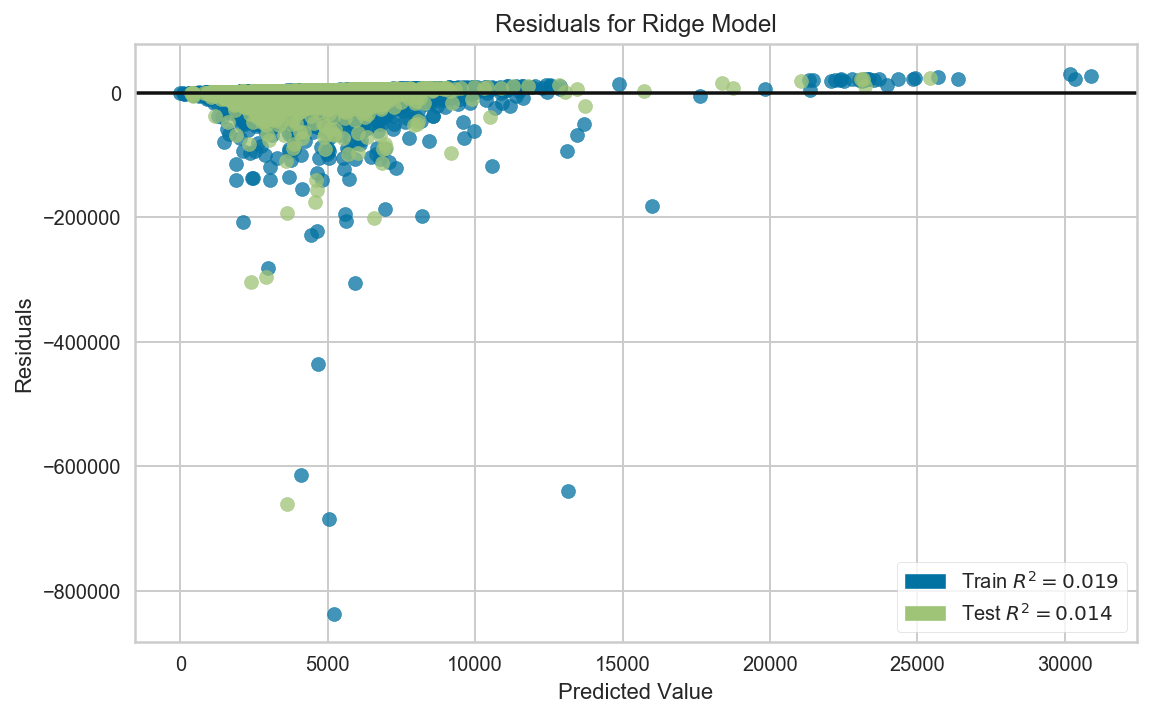

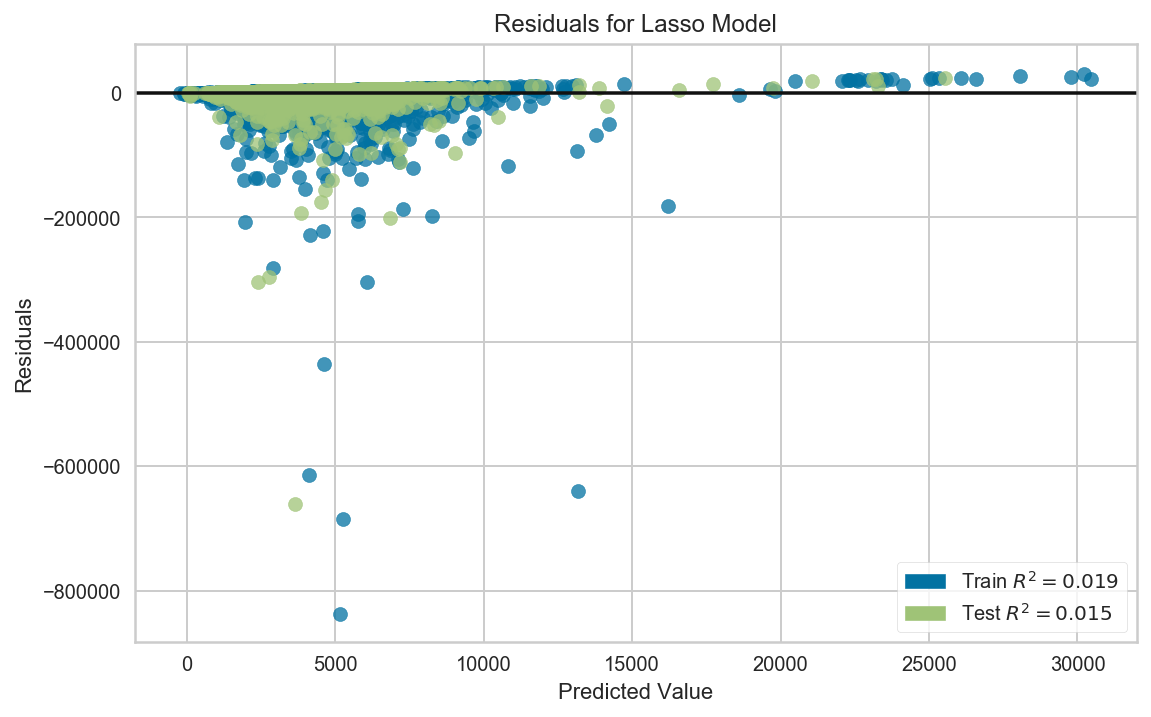

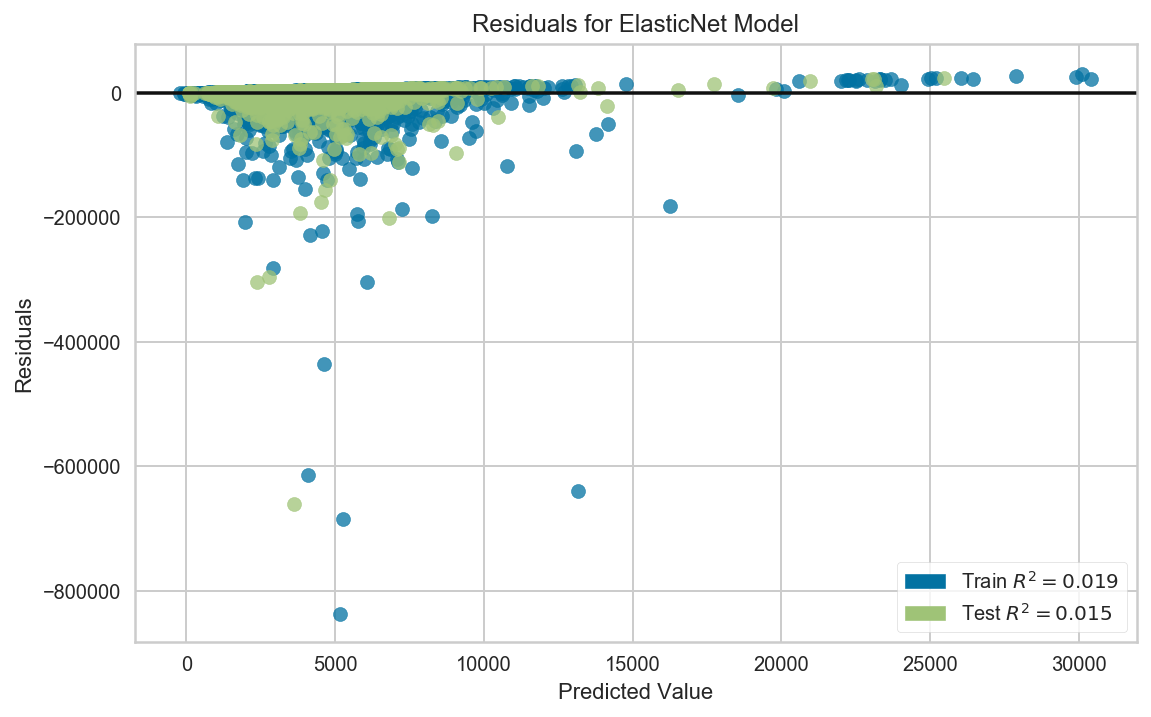

In [30]:
import yellowbrick.regressor
from yellowbrick.regressor import ResidualsPlot

# ridge = Ridge()
visualizer = ResidualsPlot(ridge_reg,hist=False)

visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.poof()

# lasso = Lasso()
visualizer = ResidualsPlot(lasso_reg,hist=False)

visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.poof() 

# enet = ElasticNet()
visualizer = ResidualsPlot(enet,hist=False)

visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.poof() 

## 5) Build the best model with all the features.

Run a proper evaluation with cross validation, analysis of the residuals, analysis of the coefficients, etc. Try the different models we studied (lasso, ridge, etc.) and play with their parameters to try to improve the performances.

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

df3 = df.copy(deep=True)

y = df3['shares']
X = df3.iloc[:,2:-6]

ss = StandardScaler()
Xs = ss.fit_transform(X)

# create train-test set ratio: 0.2 - 0.8
X_train, X_test, y_train, y_test = \
            train_test_split(Xs, y, test_size= 0.2)

print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(31715, 57) (31715,)
(7929, 57) (7929,)


In [32]:
## optimal value for ridge regression alpha

ridge_reg_alphas = np.logspace(-2,7,50)

optimal_ridge = RidgeCV(alphas=ridge_reg_alphas, cv=10)

optimal_ridge.fit(Xs, y)
print('optimal ridge alpha is: ',optimal_ridge.alpha_)

## finding R^2 for ridge regression using optimal alpha

ridge_reg = Ridge(alpha=optimal_ridge.alpha_)
ridge_scores = cross_val_score(ridge_reg, Xs, y, cv=10)
print('R2 for ridge is: ',np.mean(ridge_scores))

## optimal value for lasso regression alpha

optimal_lasso = LassoCV(cv=10, verbose=1)

optimal_lasso.fit(Xs, y)
print('optimal lasso alpha is: ',optimal_lasso.alpha_)

## finding R^2 for ridge regression using optimal alpha

lasso_reg = Lasso(alpha=optimal_lasso.alpha_)
lasso_scores = cross_val_score(lasso_reg, Xs, y, cv=10)
print('R2 for lasso is: ',np.mean(lasso_scores))

## optimal value for elastic net regression alpha

l1_ratios = np.linspace(0.01, 1.0, 30)
optimal_enet = ElasticNetCV(l1_ratio=l1_ratios,\
                            n_alphas=50, cv=10)
optimal_enet.fit(Xs, y)
print('optimal elastic net alpha is: ',optimal_enet.alpha_)
print('l1_ratio :',optimal_enet.l1_ratio_)

## R^2 for elastic net regression using optimal alpha
enet = ElasticNet(alpha=optimal_enet.alpha_,\
                  l1_ratio=optimal_enet.l1_ratio_)
enet_scores = cross_val_score(enet, Xs, y, cv=10)
print('R2 for elastic net is: ',np.mean(enet_scores))

optimal ridge alpha is:  2120.9508879201926
R2 for ridge is:  0.02045824679535333


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
................................................................................................../anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
./anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
......................................................................................................................................................................................................../anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate

optimal lasso alpha is:  18.196806500533064
R2 for lasso is:  0.021065762292749524


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of

optimal elastic net alpha is:  18.695855018420183
l1_ratio : 1.0
R2 for elastic net is:  0.021071399515215417


**Comparing coefficients of Ridge, Lasso and Elastic Net (all features)**

In [38]:
ridge_reg.fit(Xs,y)
ridge_coefs = pd.DataFrame({'variable':X.columns,\
                           'coef':ridge_reg.coef_,\
                    'abs_coef':np.abs(ridge_reg.coef_)})

ridge_coefs.sort_values('abs_coef',inplace=True,\
                        ascending=False)
ridge_coefs.head(5)

,variable,coef,abs_coef
25,kw_avg_avg,1309.628069,1309.628069
24,kw_max_avg,-546.320297,546.320297
12,data_channel_is_entertainment,-450.843625,450.843625
26,self_reference_min_shares,394.928023,394.928023
5,num_hrefs,308.211970,308.211970


In [34]:
lasso_reg.fit(Xs,y)
lasso_coefs = pd.DataFrame({'variable':X.columns,\
                           'coef':lasso_reg.coef_,\
                    'abs_coef':np.abs(lasso_reg.coef_)})

lasso_coefs.sort_values('abs_coef',inplace=True,\
                        ascending=False)
lasso_coefs.head(5)

,variable,coef,abs_coef
25,kw_avg_avg,1902.906065,1902.906065
24,kw_max_avg,-961.659088,961.659088
26,self_reference_min_shares,438.998452,438.998452
12,data_channel_is_entertainment,-337.999833,337.999833
23,kw_min_avg,-313.875819,313.875819


In [35]:
enet.fit(Xs,y)
enet_coefs = pd.DataFrame({'variable':X.columns,\
                           'coef':enet.coef_,\
                           'abs_coef':np.abs(enet.coef_)})

enet_coefs.sort_values('abs_coef',inplace=True,\
                        ascending=False)
enet_coefs.head(5)

,variable,coef,abs_coef
25,kw_avg_avg,1896.429053,1896.429053
24,kw_max_avg,-955.226821,955.226821
26,self_reference_min_shares,438.849505,438.849505
12,data_channel_is_entertainment,-337.152983,337.152983
23,kw_min_avg,-311.450358,311.450358


**Comparing residuals of Ridge, Lasso and Elastic Net**

Residuals Plot function from Yellowbrick module plots the difference between the expected and actual values

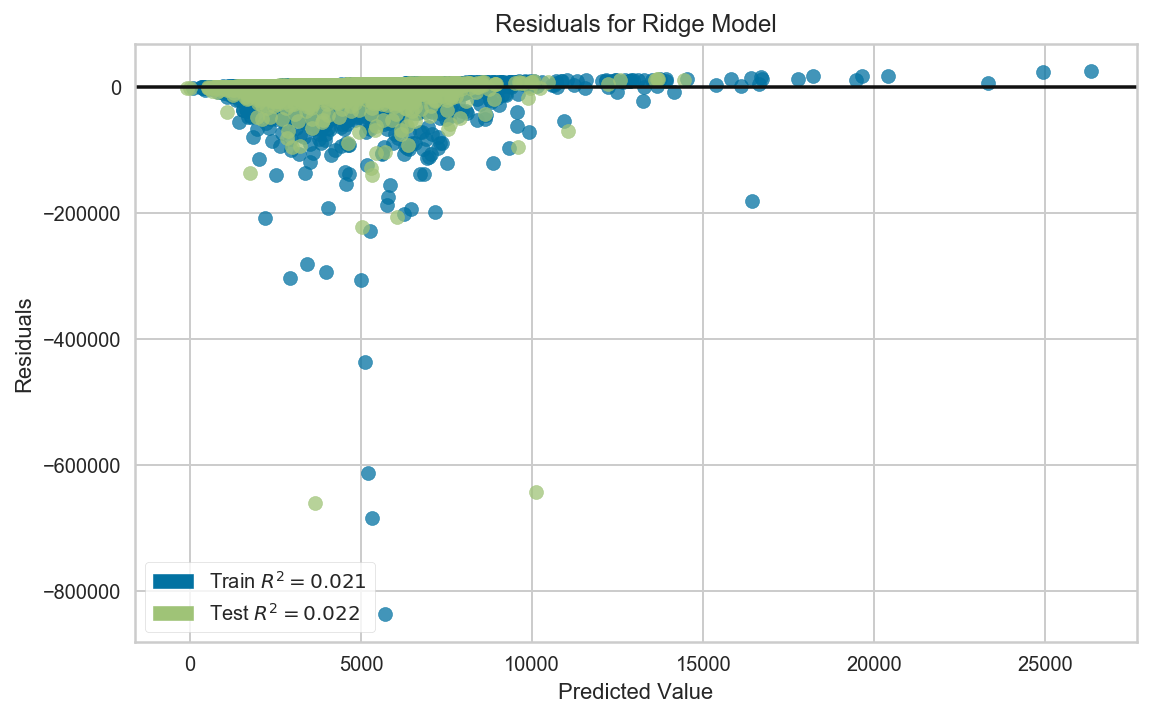

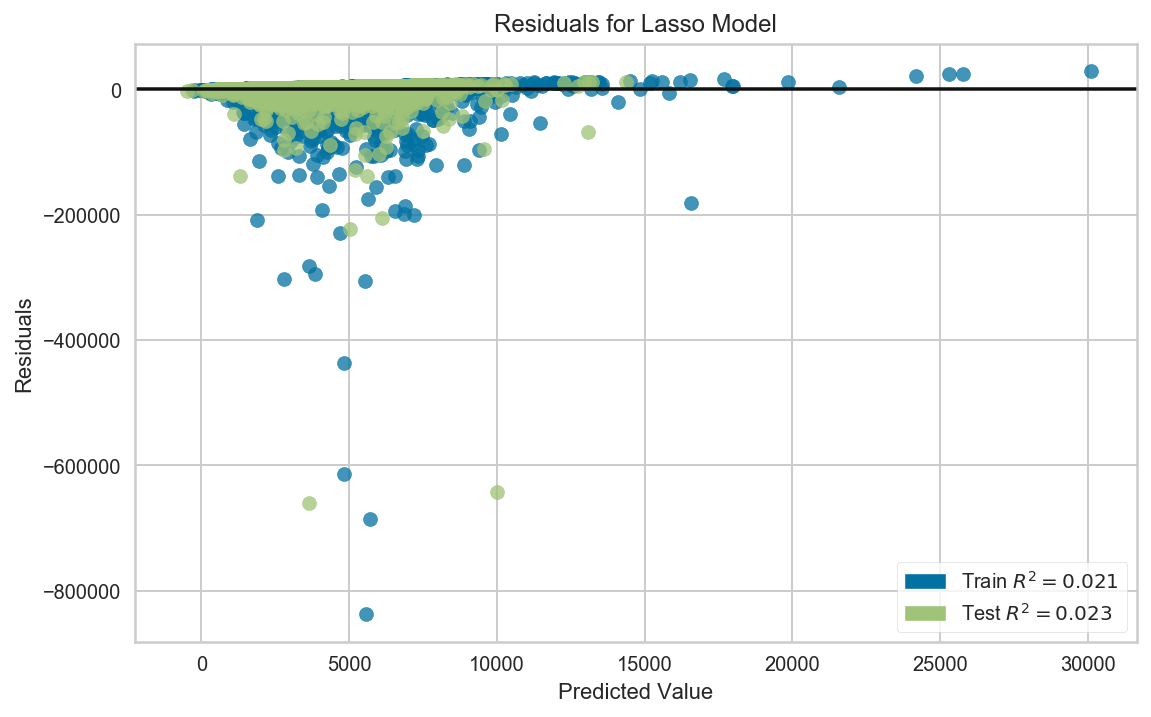

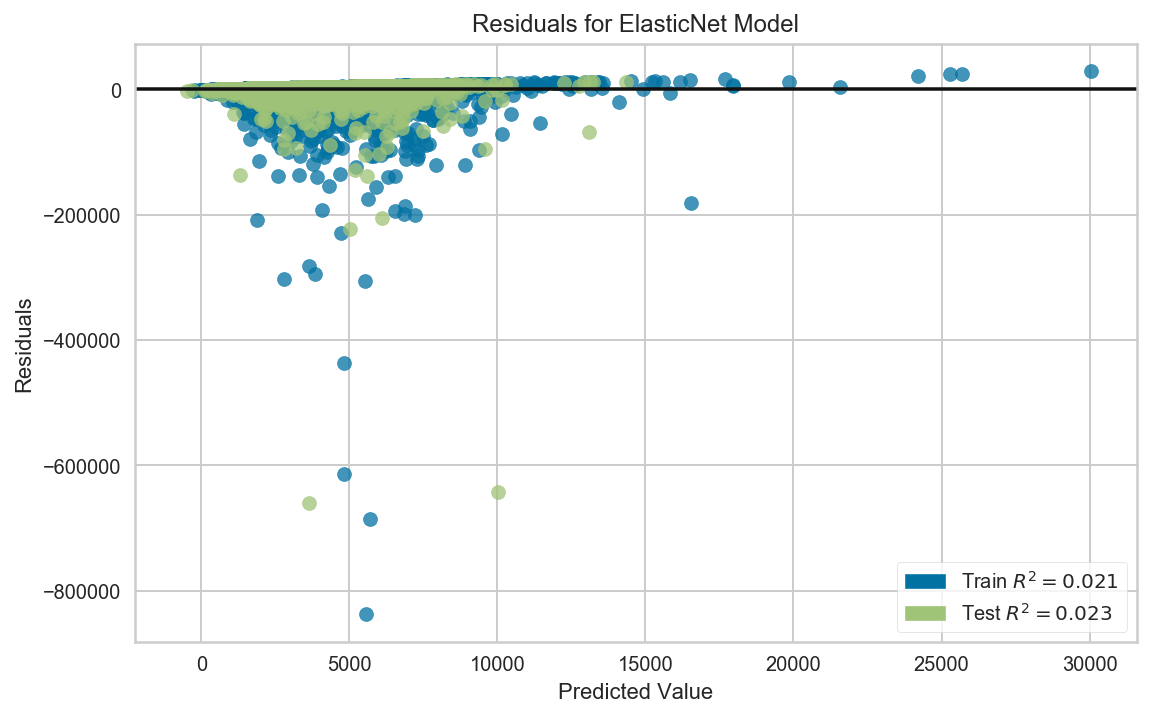

In [36]:
import yellowbrick.regressor
from yellowbrick.regressor import ResidualsPlot

# ridge = Ridge()
visualizer = ResidualsPlot(ridge_reg,hist=False)

visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.poof()

# lasso = Lasso()
visualizer = ResidualsPlot(lasso_reg,hist=False)

visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.poof() 

# enet = ElasticNet()
visualizer = ResidualsPlot(enet,hist=False)

visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.poof() 

## 6) After building the model, what are the most important features?

Write a small "business repost" about them (i.e. just a few sentences explaining the results of the model from a business prospective).

**Ans**:

Based on the model results, the top 5 features that influence the number of shares an article attracts are:

- the average number of shares for an average keyword
- the maximum number of shares for an average keyword
- whether the type of channel is entertainment
- the minimum number of shares of referenced articles in Mashable
- the number of links in the article

**Model with 5 & 10 features**:

**'kw_avg_avg'**: average keyword (avg shares), 
**'LDA_03'**: closeness to LDA topic 3, 
**'kw_max_avg'**: average keyword (max shares), 
**'LDA_02'**: closeness to LDA topic 2, 
**'self_reference_avg_sharess'**: average shares of referenced articles in Mashable, 
**'self_reference_min_shares'**: minimum shares of referenced articles in Mashable, 
**'data_channel_is_world'**: Dummy variable for data channel 'World', 
**'self_reference_max_shares'**: maximum shares of referenced articles in Mashable, 
**'num_hrefs'**: number of links, 
**'kw_avg_max'**: Best keyword (avg shares), 

**Model with all features**:

ridge reg (top 5 coeff): kw_avg_avg, kw_max_avg, data_channel_is_entertainment, self_reference_min_shares, num_hrefs

lasso & enet reg (top 5 coeff): kw_avg_avg, kw_max_avg, self_reference_min_shares, data_channel_is_entertainment, kw_min_avg

## 7) Do some feature engineering to try to improve the model.

(e.g. maybe you need to square a feature to get linear relationship)?

- column for article publication date
- combine channel dummy variables into single column
- combine weekday dummy variables into single column

## 8) Can you think about other possible good predictors not available in the dataset?

**Possible good predictors**:

- whether the article was accessed through a mobile or desktop browser
- length of time that user spent reading the article
- number of views for the article

## 9) Using lasso to select features (by playing with the regularization strength), plot the number of features against the MSE.

In [ ]:
# unsure how to do

## 10) In this context, would you use mean squared error, median squared error, mean absolute error or median absolute error to evaluate the models?

Explain pros/cons of the different metrics.

In [ ]:
# unsure how to do

## 11) Try knn as a model (and play with the parameters).

Did you get better results compared the linear models? --> https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html

In [ ]:
# no time

## 12) Try artificial neural networks (and play with the parameters).

Did you get better results compared the linear models? --> https://scikit-learn.org/stable/modules/neural_networks_supervised.html

In [ ]:
# no time